# ITMAL Exercise

REVISIONS| |
---------| |
2018-1219| CEF, initial.                  
2018-0214| CEF, major update and put in sync with under/overfitting exe.         
2018-0220| CEF, fixed revision table malformatting.
2018-0225| CEF, minor text updates, and made Qc optional.
2018-0225| CEF, updated code, made more functions.
2018-0311| CEF, corrected RSME to RMSE.
2019-1008| CEF, updated to ITMAL E19.

## Generalization Error

In this exercise, we need to explain all important overall concepts in training. Let's begin with Figure 5.3 from Deep Learning, Ian Goodfellow, et. al. [DL], that pretty much sums it all up

<img src="https://itundervisning.ase.au.dk/E19_itmal/L07/Figs/dl_generalization_error.png" style="height:500px">

### Qa On Generalization Error

Write a detailed description of figure 5.3 (above) for your hand-in.
 
All concepts in the figure must be explained 

* training/generalization error, 
* underfit/overfit zone, 
* optimal capacity, 
* generalization gab, 
* and the two axes: x/capacity, y/error.

## Qa) Answer

Capacity is a metric for the complexity of a model, and the relationships the model is capable of describing. This often goes hand in hand the the amount of parameters the model can adjust.

When a models capacity increases, so does its ability to predict the data it was trained on, as seen by the always-decreasing blue line for training errors. 
The underfitting and overfitting zones say something about whether this capacity-fueled increasing ability to predict the training data, has come at the cost of its ability to generalize across different input datasets.

The generalization error is a metric for how well the model predicts data with the same statistical properties as the training set, but not the training set specifically. In most cases, this is what we are trying to optimize the model for, as the data we will feed the model in the future will not be an exact copy of the training data, but will have the same statistical properties, which is why the optimal capacity is determined by the global minimum of the generalization error. This is also the amount of capacity that seperates the underfitting and overfitting zone, illustrated with a red line in the figure. The futher from this line in any direction, affects the models performance negatively.

The difference between the models performance on the training data, and the models performance on non-training data, is called the generalization gap. This gap increases with capacity, as the model becomes more and more accustomed to the training data.

### Qb A MSE-Epoch/Error Plot

Next, we look at a SGD model for fitting polynomial, that _polynomial regression_ similar to what Géron describes in [HOML] ("Polynomial Regression" + "Learning Curves"). 

Review the code below for plotting the RMSE vs. the iteration number or epoch below (three cells, part I/II/III). 

Write a short description of the code, and comment on the important points in the generation of the (R)MSE array.

The training phase output lots of lines like 

> `epoch= 104, mse_train=1.50, mse_val=2.37` <br>
> `epoch= 105, mse_train=1.49, mse_val=2.35`

What is an ___epoch___ and what is `mse_train` and `mse_val`?

NOTE: the generalization plot above (figure 5.3 in [DL]) and the plots below have different x-axis, and are not to be compared directly!

X_train.shape= (25, 1)
X_val  .shape= (25, 1)
y_train.shape= (25,)
y_val  .shape= (25,)
OK


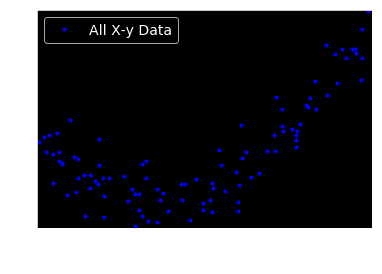

In [1]:
# Run code: Qb(part I)
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

def GenerateData():
    m = 100
    X = 6 * np.random.rand(m, 1) - 3
    y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
    return X, y

X, y = GenerateData()
X_train, X_val, y_train, y_val = \
    train_test_split( \
        X[:50], y[:50].ravel(), \
        test_size=0.5, \
        random_state=10)

print("X_train.shape=",X_train.shape)
print("X_val  .shape=",X_val.shape)
print("y_train.shape=",y_train.shape)
print("y_val  .shape=",y_val.shape)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled   = poly_scaler.transform(X_val)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
plt.plot(X, y, "b.", label="All X-y Data")
plt.xlabel("$x_1$", fontsize=18, )
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

print('OK')      

In [2]:
# Run code: Qb(part II)

def Train(X_train, y_train, X_val, y_val, n_epochs, verbose=False):
    print("Training...n_epochs=",n_epochs)
    train_errors, val_errors = [], []
    
    sgd_reg = SGDRegressor(max_iter=1,
                           penalty=None,
                           eta0=0.0005,
                           warm_start=True,
                           learning_rate="constant",
                           tol=-float("inf"),
                           random_state=42)

    for epoch in range(n_epochs):
        sgd_reg.fit(X_train, y_train)
        y_train_predict = sgd_reg.predict(X_train)
        y_val_predict   = sgd_reg.predict(X_val)

        mse_train=mean_squared_error(y_train, y_train_predict)
        mse_val  =mean_squared_error(y_val  , y_val_predict)

        train_errors.append(mse_train)
        val_errors  .append(mse_val)
        if verbose:
            print(f"  epoch={epoch:4d}, mse_train={mse_train:4.2f}, mse_val={mse_val:4.2f}")

    return train_errors, val_errors

n_epochs = 500
train_errors, val_errors = Train(X_train_poly_scaled, y_train, X_val_poly_scaled, y_val, n_epochs, True)

print('OK')

0
  epoch=  35, mse_train=4.84, mse_val=6.18
  epoch=  36, mse_train=4.73, mse_val=6.07
  epoch=  37, mse_train=4.63, mse_val=5.97
  epoch=  38, mse_train=4.54, mse_val=5.86
  epoch=  39, mse_train=4.44, mse_val=5.76
  epoch=  40, mse_train=4.35, mse_val=5.66
  epoch=  41, mse_train=4.26, mse_val=5.56
  epoch=  42, mse_train=4.17, mse_val=5.47
  epoch=  43, mse_train=4.09, mse_val=5.37
  epoch=  44, mse_train=4.01, mse_val=5.28
  epoch=  45, mse_train=3.93, mse_val=5.20
  epoch=  46, mse_train=3.85, mse_val=5.11
  epoch=  47, mse_train=3.77, mse_val=5.03
  epoch=  48, mse_train=3.70, mse_val=4.95
  epoch=  49, mse_train=3.63, mse_val=4.87
  epoch=  50, mse_train=3.56, mse_val=4.79
  epoch=  51, mse_train=3.49, mse_val=4.71
  epoch=  52, mse_train=3.42, mse_val=4.64
  epoch=  53, mse_train=3.36, mse_val=4.57
  epoch=  54, mse_train=3.29, mse_val=4.49
  epoch=  55, mse_train=3.23, mse_val=4.43
  epoch=  56, mse_train=3.17, mse_val=4.36
  epoch=  57, mse_train=3.11, mse_val=4.29
  epoch= 

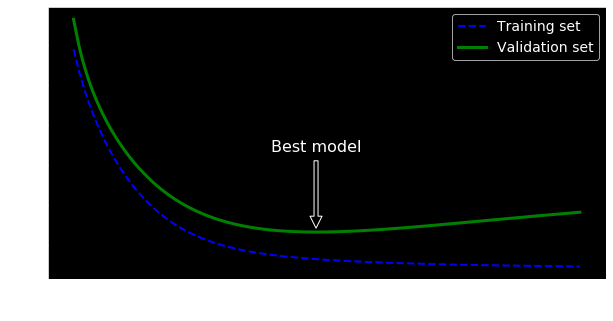

In [3]:
# Run code: Qb(part III)

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.figure(figsize=(10,5))
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(train_errors), "b--", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors), "g-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

## Qb) Answer

Part 1: First, some random data is generated and split into training and test data. The data is then processed thorugh a preprocessing pipeline, consisting of the PolynomialFeatures and StandardScaler.
The original data is also plotted.

Part 2: The `Train()` function takes in the (preprocessed) training and validation data, along with a parameter specifying the desired number of epochs. 
An epoch in this case means an iteration (of the for-loop), and determines how many times the training data is fitted to the SGDRegressor.
For each iteration of the loop, the mean-squared error of both training and validation results is calculated, and appended to their respective arrays.
The print-out shows the iteration number, along with the MSE of the models predictions for both training and validation data, which resulted from that iteration

Part3: Lastly, the best epoch is found, and the data from the two arrays is plotted.
The best epoch is calculated by finding the global minimum of the entries in the validation-error array

### [OPTIONAL] Qc  Early Stopping

How would you implement ___early stopping___, in the code above? 

Try it out in the code, and write an explanation of the early stopping concept.

In [ ]:
# TODO: Qc...

### Qd Explain the Polynomial RMSE-Capacity plot

Now we revisit the concepts from `capacity_under_overfitting.ipynb` notebook and the polynomial fitting with a given capacity (polynomial degree).

Peek into the cell below, and explain the generated RMSE-Capacity plot. Why does the _training error keep dropping_, while the _CV-error drops_ until around capacity 3, and then begin to rise again?

What does the x-axis _Capacity_ and y-axis _RMSE_ represent?

Try increasing the model capacity. What happens when you do plots for `degrees` larger than around 10?

In [ ]:
# Run and review this code
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData():
    n_samples = 30
    #degrees = [1, 4, 15]
    degrees = range(1,8)

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y, degrees

np.random.seed(0)
X, y, degrees  = GenerateData()

print("Iterating...degrees=",degrees)
capacities, rmses_training, rmses_cv= [], [], []
for i in range(len(degrees)):
    d=degrees[i]
    
    polynomial_features = PolynomialFeatures(degree=d, include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    
    Z = X[:, np.newaxis]
    pipeline.fit(Z, y)
    
    p = pipeline.predict(Z)
    train_rms = mean_squared_error(y,p)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, Z, y, scoring="neg_mean_squared_error", cv=10)
    score_mean = -scores.mean()
    
    rmse_training=sqrt(train_rms)
    rmse_cv=sqrt(score_mean)
    
    print(f"  degree={d:4d}, rmse_training={rmse_training:4.2f}, rmse_cv={rmse_cv:4.2f}")
    
    capacities    .append(d)
    rmses_training.append(rmse_training)
    rmses_cv      .append(rmse_cv)
    
plt.figure(figsize=(7,4))
plt.plot(capacities, rmses_training, "b--", linewidth=2, label="training RMSE")
plt.plot(capacities, rmses_cv, "g-", linewidth=2, label="CV RMSE")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Capacity", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

In [ ]:
# TODO: Qd...answer in text form